## Credit card status payment


During this paper, we will analyze the information provided on credit card usage of a set of customers in a bank in Taiwan. With this information we will build a model to predict payments.

### Variables

* CREDIT ID: Identifier of each client. LIMIT BAL: Credit Line Amount 
* SEX: Gender (1=male, 2=female) 
* EDUCATION: (1=high school, 2=college, 3= Middle School, 4=other, 5=unknown, 6=unknown) 
* MARRIAGE: Marital status (1=married, 2=single, 3=other) 
* AGE: Age in years 
* DEFAULT - Default payment next month (Yes=1, No=0)
* PAST_PAY - History of repayment status
    - PAST_PAY1 = the repayment status in September 2005
    - PAST_PAY2 = the repayment status in August 2005
    - PAST_PAY6 = the repayment status in April 2005
    - The measurement scale for the repayment status is
    i.  -1 = pay duly <br>
    ii.  1 = payment delay for one month<br>
    iii. 2 = payment delay for two months <br>
    iv.  8 = payment delay for eight months<br>
    v.   9 = payment delay for nine months and above <br>
* BILL_AMT- Amount of bill statement (INR)
    - BILL_AMT1 = amount of bill statement in September 2005
    - BILL_AMT2 = amount of bill statement in August 2005
    - BILL_AMT6 = amount of bill statement in April 2005
* PAY_AMT - Amount of previous payment (INR)
    - PAY_AMT1 = amount paid in September 2005
    - PAY_AMT2 = amount paid in August 2005
    - PAY_AMT6 = amount paid in April 2005

### Libraries 

In [23]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn import svm as sv
from warnings import filterwarnings
from scipy.stats import zscore
from scipy import stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:

filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

### Importing Data 

In [3]:
data = pd.read_csv('UCI_Credit_Card.csv')
data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Feature Engineering 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#Show Nan values
multis = data.ID.value_counts() 
multis = multis[multis.values>1] 
multis

Series([], Name: ID, dtype: int64)

In [7]:
#Duplicate Values 
duplicates_index = data[data.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

In [8]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [9]:
#The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [10]:
data = data.drop(data.columns[0], axis = 1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [12]:
#Outliers
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]
data.count()

LIMIT_BAL                     26697
SEX                           26697
EDUCATION                     26697
MARRIAGE                      26697
AGE                           26697
PAY_0                         26697
PAY_2                         26697
PAY_3                         26697
PAY_4                         26697
PAY_5                         26697
PAY_6                         26697
BILL_AMT1                     26697
BILL_AMT2                     26697
BILL_AMT3                     26697
BILL_AMT4                     26697
BILL_AMT5                     26697
BILL_AMT6                     26697
PAY_AMT1                      26697
PAY_AMT2                      26697
PAY_AMT3                      26697
PAY_AMT4                      26697
PAY_AMT5                      26697
PAY_AMT6                      26697
default.payment.next.month    26697
dtype: int64

### Data visualization

<AxesSubplot:xlabel='PAY_AMT2', ylabel='count'>

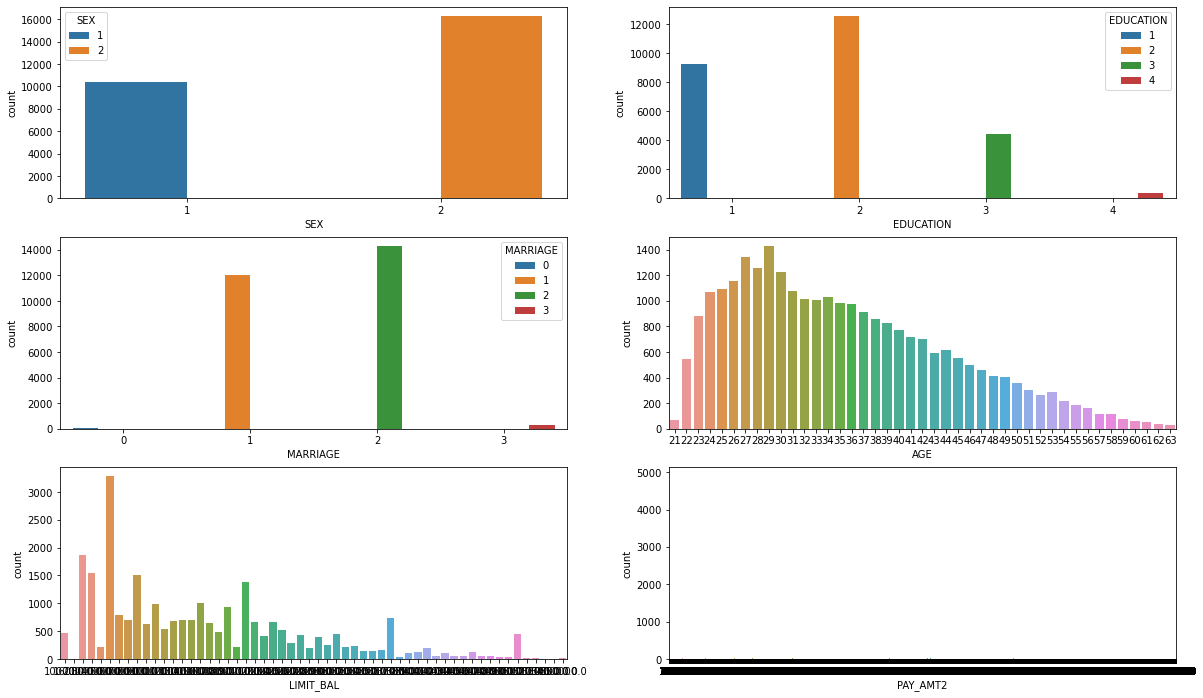

In [13]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='SEX', hue = 'SEX', data = data, ax=axarr[0][0])
sns.countplot(x='EDUCATION', hue = 'EDUCATION', data = data, ax=axarr[0][1])
sns.countplot(x='MARRIAGE', hue = 'MARRIAGE', data = data, ax=axarr[1][0])
sns.countplot(x='AGE', data = data, ax=axarr[1][1])
sns.countplot(x='LIMIT_BAL', data = data, ax=axarr[2][0])
sns.countplot(x='PAY_AMT2', data = data, ax=axarr[2][1])

There are 27,000 credit card clients.

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,658 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

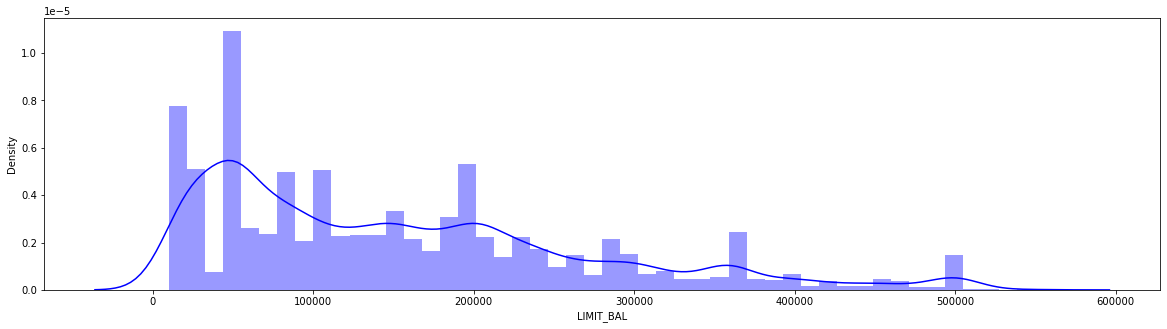

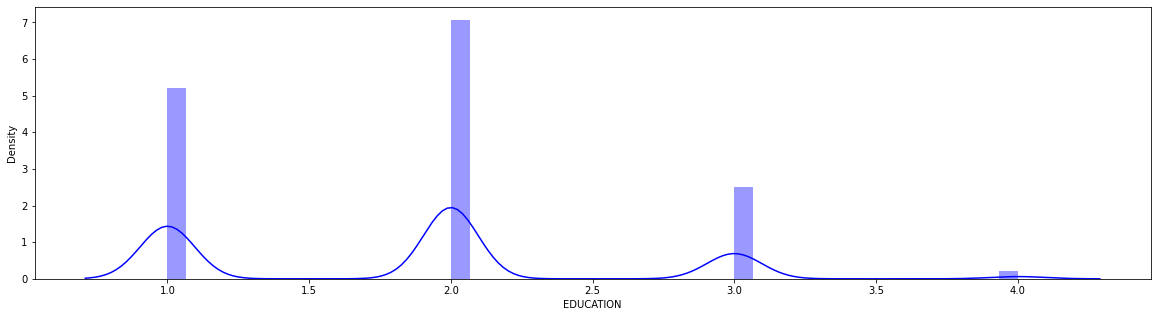

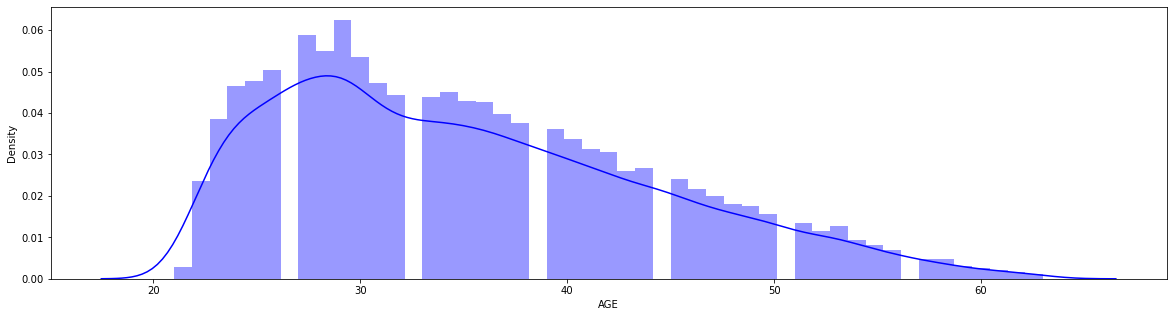

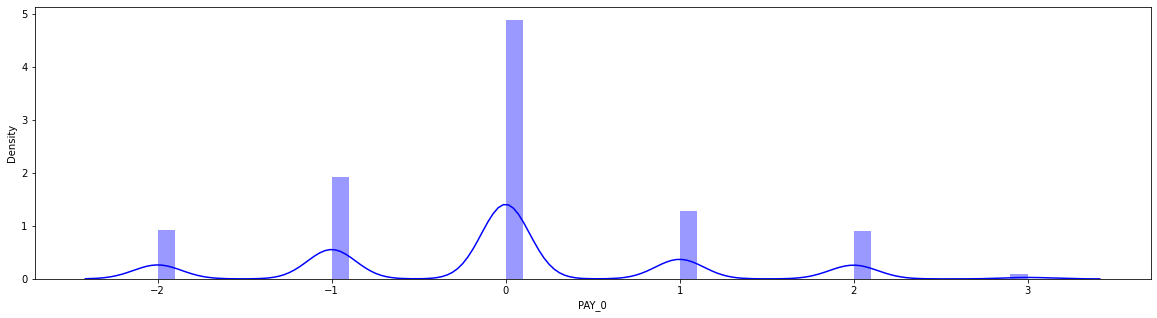

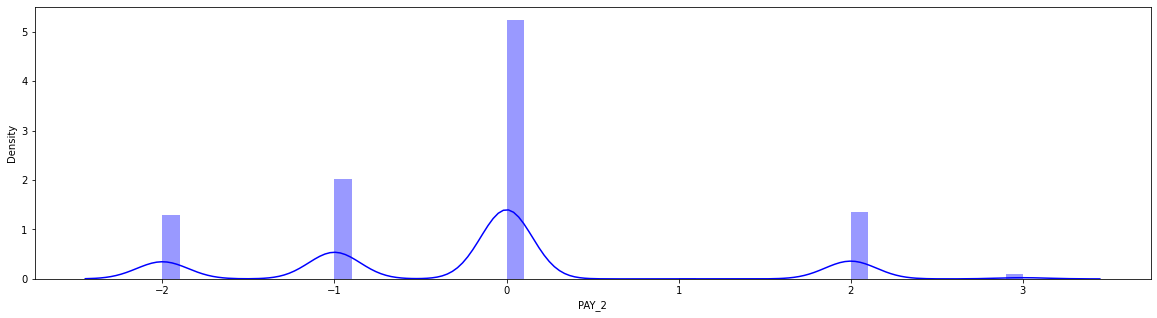

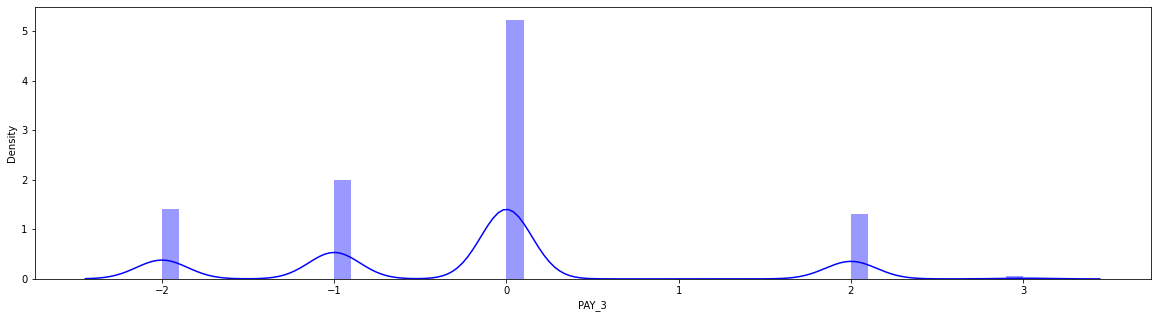

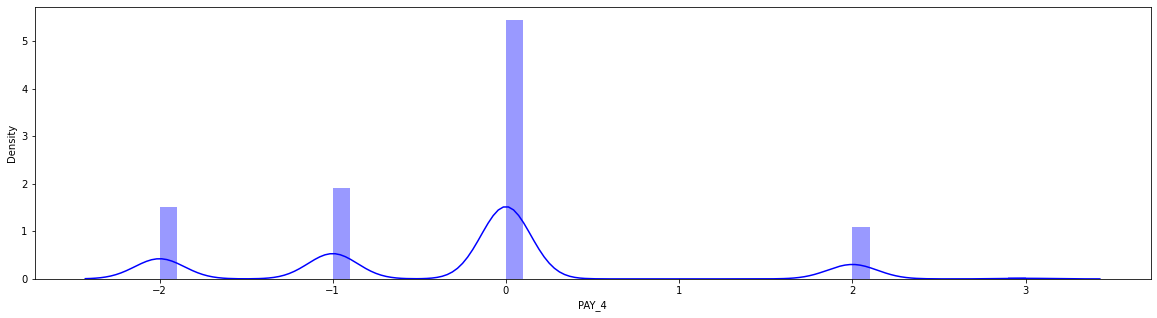

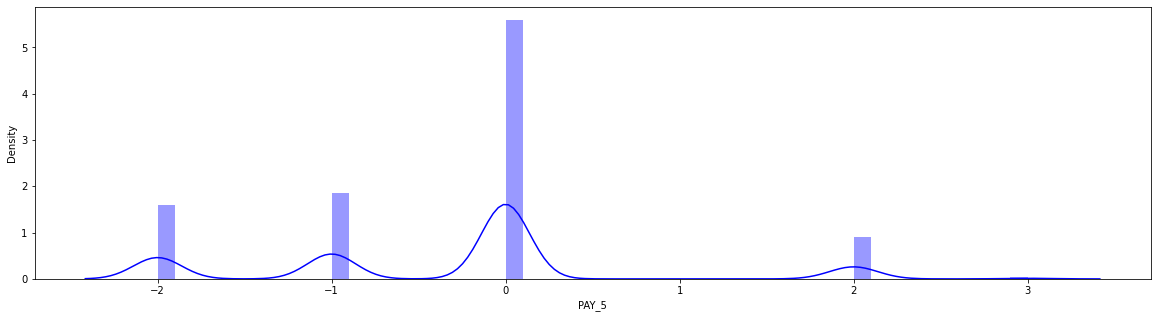

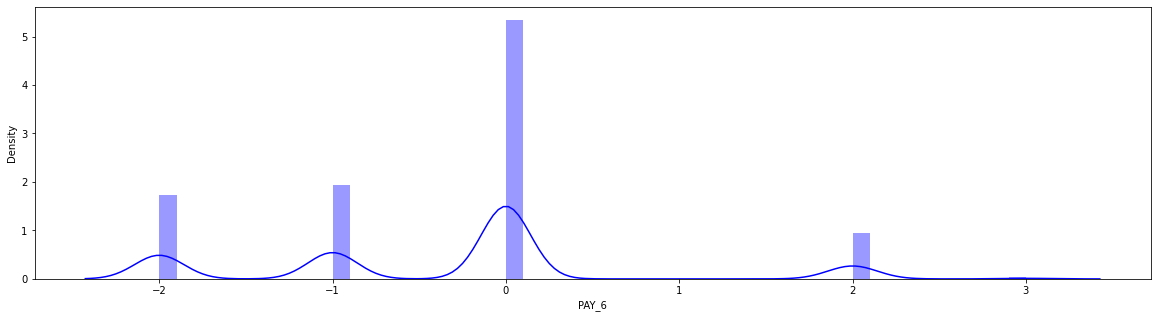

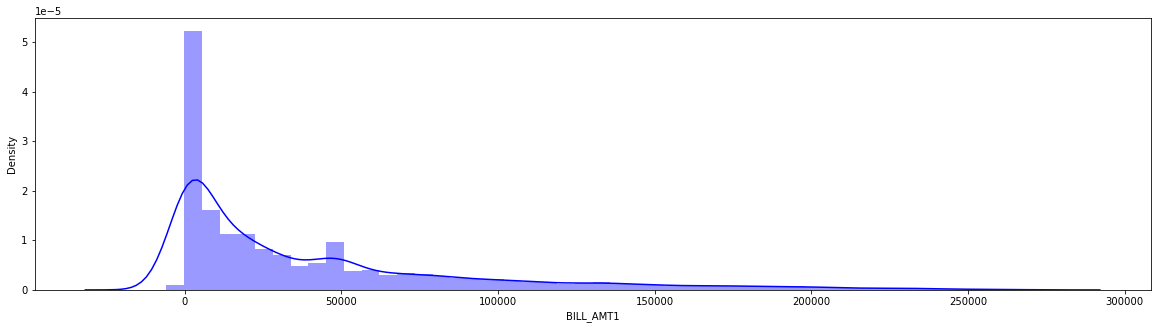

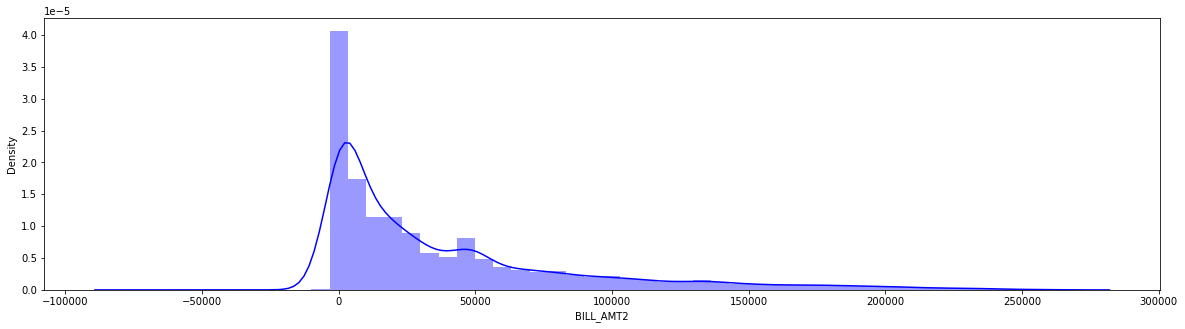

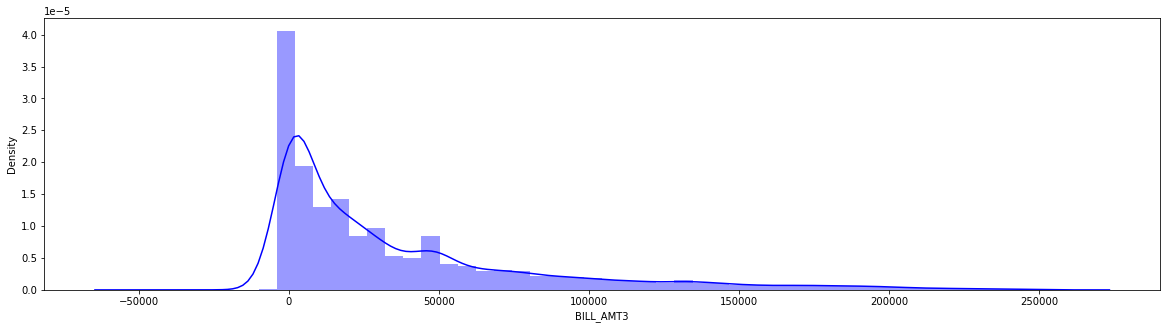

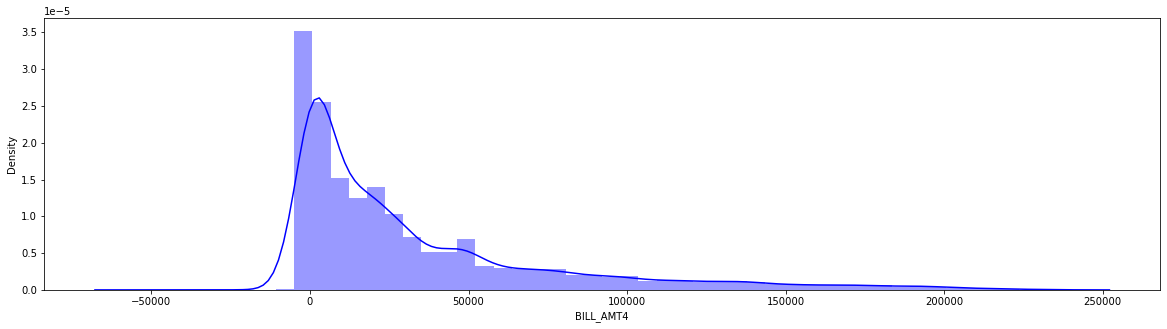

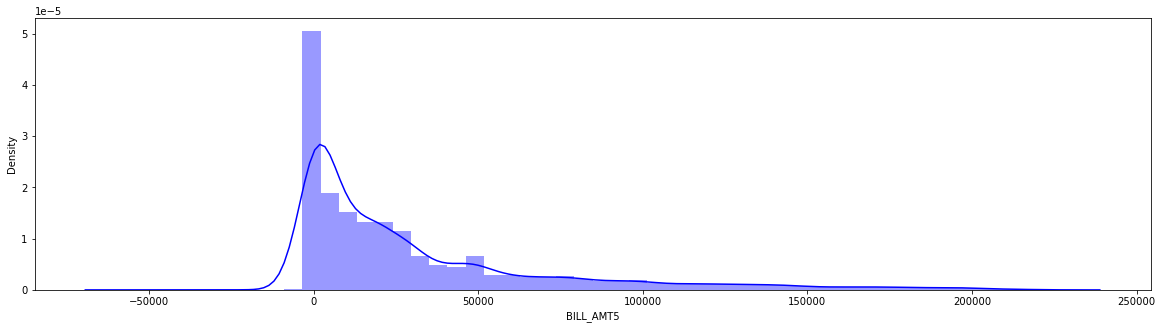

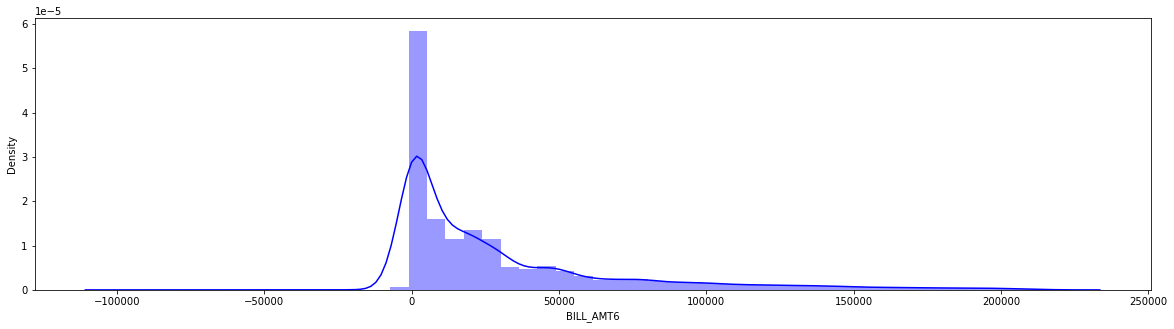

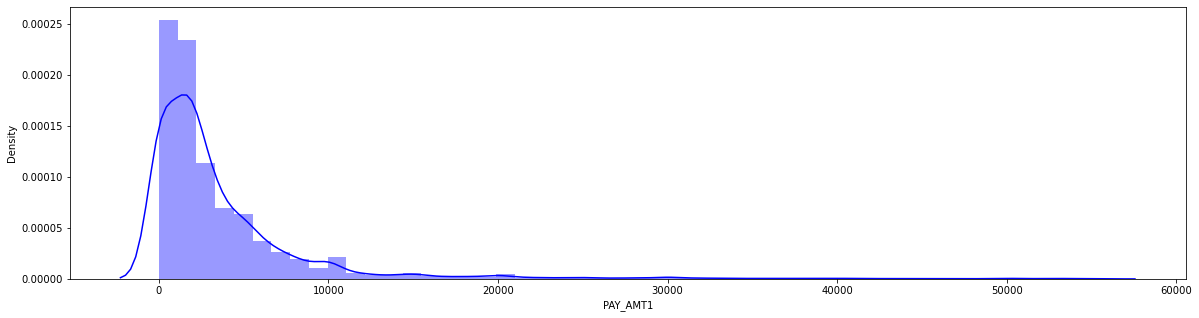

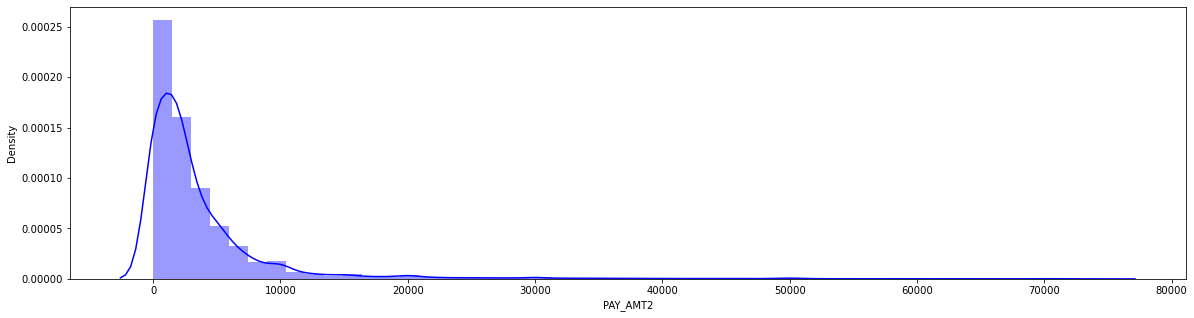

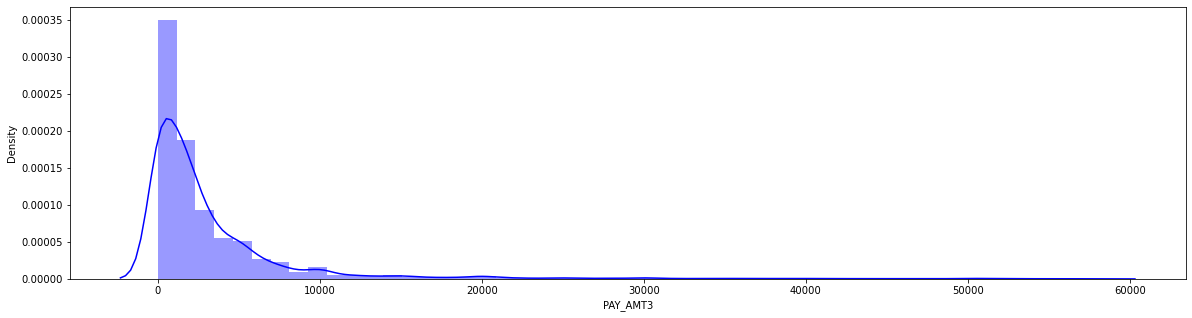

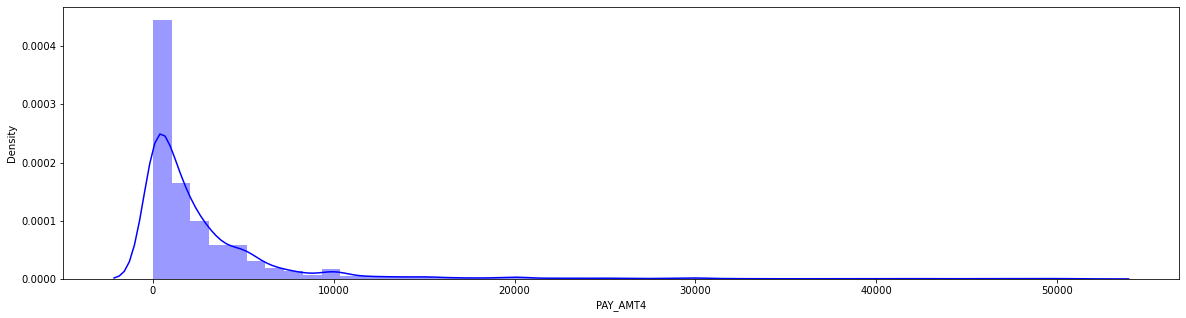

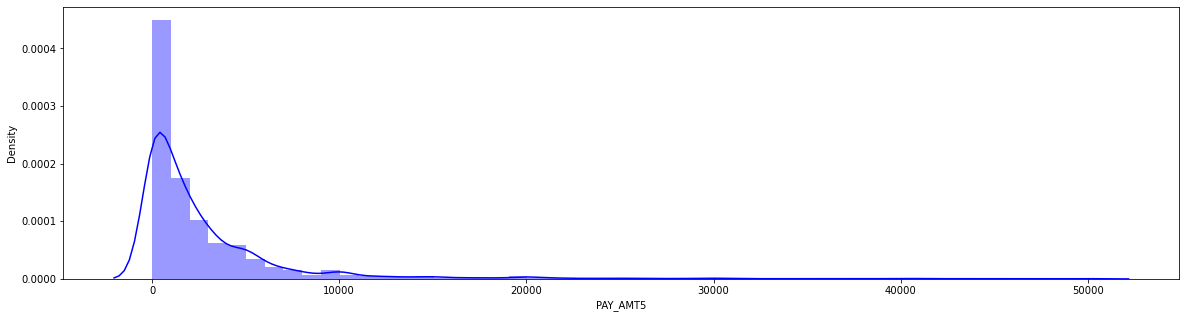

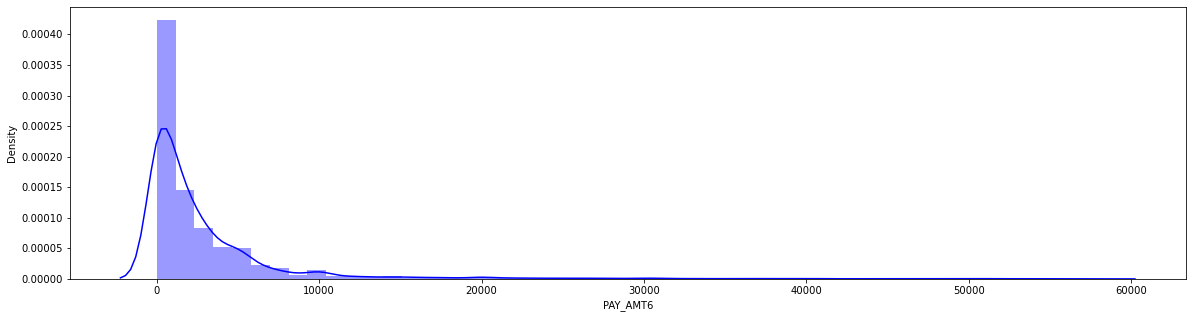

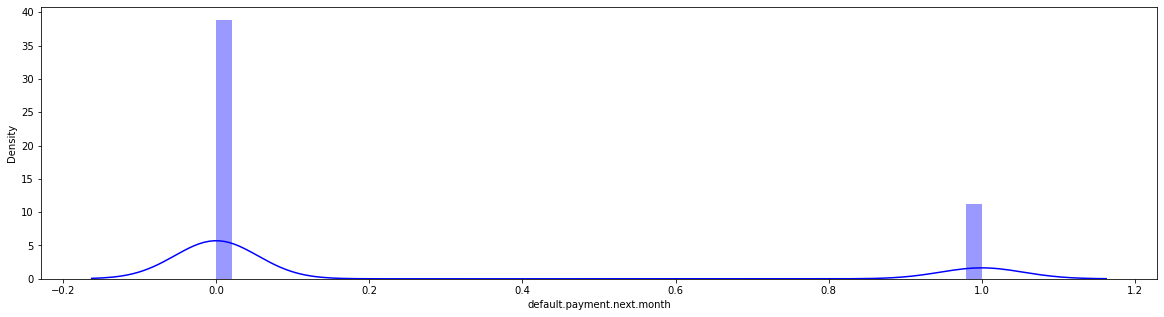

In [14]:
#Distribution Plot:
con_col = data.drop(['SEX', 'MARRIAGE'], axis = 1)
for i in con_col:
    plt.figure(figsize=(20,5))
    sns.distplot(data[i],color='b')
    plt.show()

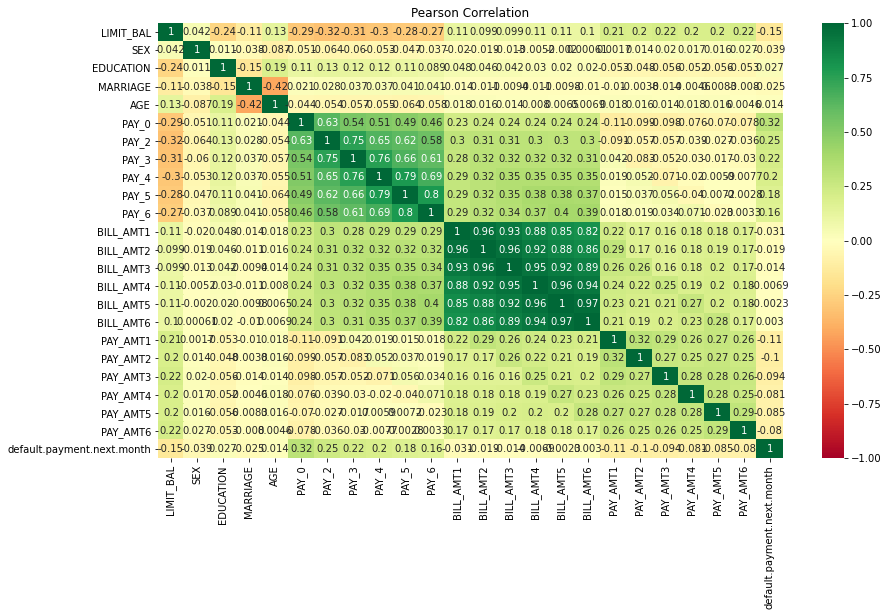

In [15]:
corr_pearson = data.corr(method = 'pearson')
fig = plt.figure(figsize = (14,8))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

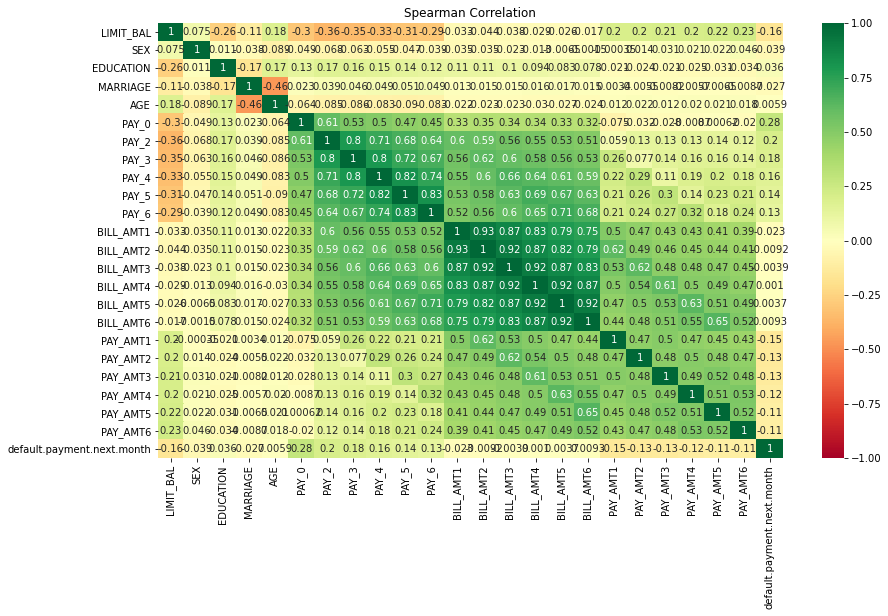

In [16]:
corr_spearman = data.corr(method = 'spearman')
fig = plt.figure(figsize = (14,8))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.title('Spearman Correlation')
plt.show()

<AxesSubplot:>

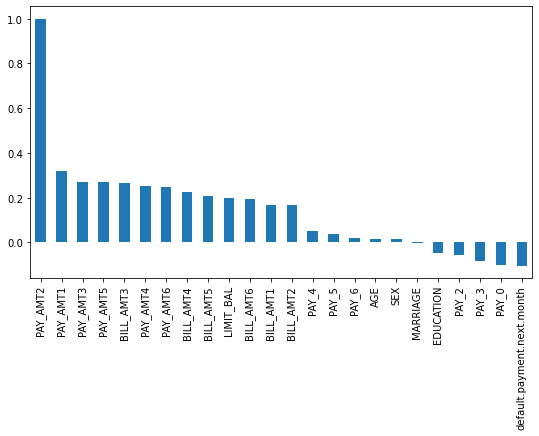

In [17]:
fig, ax = plt.subplots(figsize=(9,5))
data.corr()["PAY_AMT2"].sort_values(ascending=False).plot(kind="bar", ax=ax)

### Modeling 


In [24]:
x_data = data.drop("default.payment.next.month",axis=1)
y = data["default.payment.next.month"]
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
lg = LogisticRegression().fit(xTrain,yTrain)
dtc = DecisionTreeClassifier().fit(xTrain,yTrain)
rdc = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain)
svm = sv.SVC(kernel='linear').fit(xTrain,yTrain)
XG = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(xTrain,yTrain)

In [29]:
models = [lg,dtc,rdc,svm, XG]

In [30]:
for model in models: 
    name = model.__class__.__name__
    y_pred=model.predict(xTest)
    print(name + ": ")
    print("-" * 18)
    print("Accuracy:",metrics.accuracy_score(yTest, y_pred))
    print("Precision:",metrics.precision_score(yTest, y_pred))
    print("Recall:",metrics.recall_score(yTest, y_pred))
    print("F1-Score:",metrics.f1_score(yTest, y_pred))
    matrix = confusion_matrix(yTest,y_pred, labels=[1,0])
    print('Confusion matrix : \n',matrix)
    print("-" * 35)

LogisticRegression: 
------------------
Accuracy: 0.8010486891385767
Precision: 0.6918714555765595
Recall: 0.23905943827563683
F1-Score: 0.3553398058252427
Confusion matrix : 
 [[ 366 1165]
 [ 163 4981]]
-----------------------------------
DecisionTreeClassifier: 
------------------
Accuracy: 0.727940074906367
Precision: 0.4107701941139637
Recall: 0.4284781188765513
F1-Score: 0.4194373401534527
Confusion matrix : 
 [[ 656  875]
 [ 941 4203]]
-----------------------------------
RandomForestClassifier: 
------------------
Accuracy: 0.807940074906367
Precision: 0.6498194945848376
Recall: 0.3527106466361855
F1-Score: 0.4572396274343777
Confusion matrix : 
 [[ 540  991]
 [ 291 4853]]
-----------------------------------
SVC: 
------------------
Accuracy: 0.8031460674157304
Precision: 0.7200811359026369
Recall: 0.2318745917700849
F1-Score: 0.35079051383399207
Confusion matrix : 
 [[ 355 1176]
 [ 138 5006]]
-----------------------------------
GradientBoostingClassifier: 
------------------
Acc

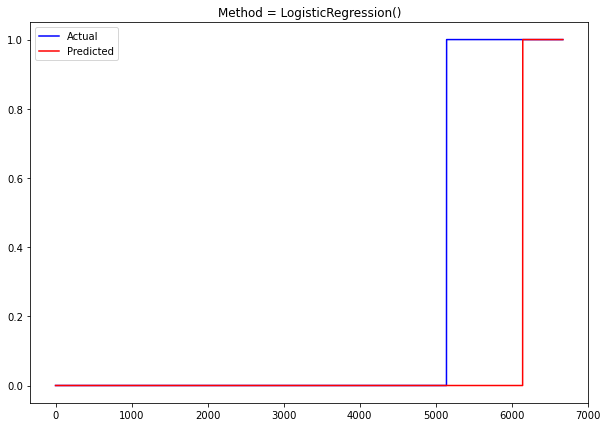

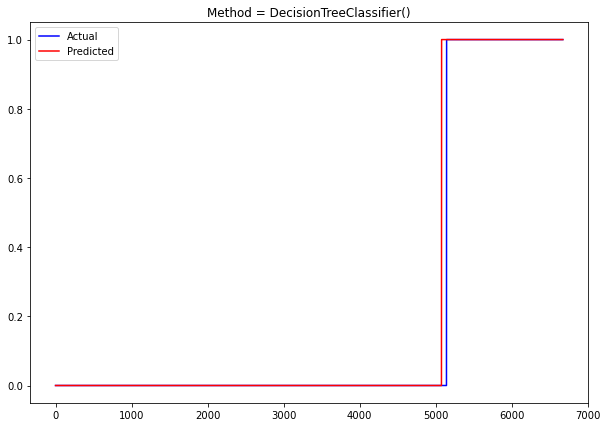

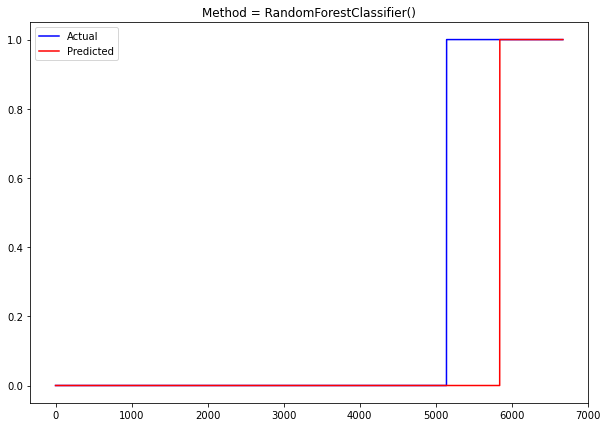

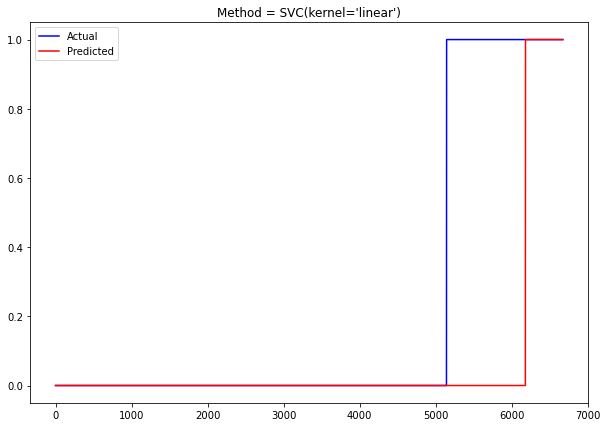

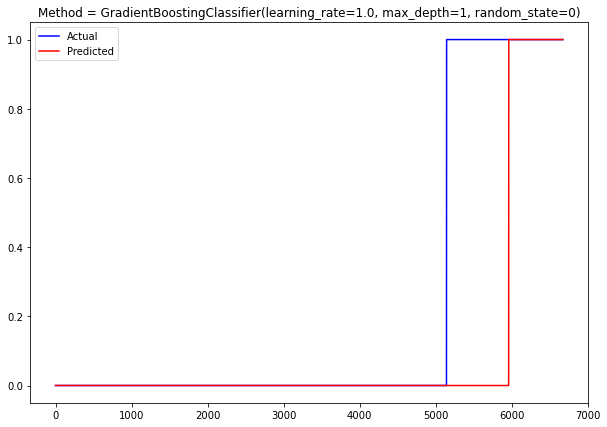

In [31]:
for pred in models:
    Y_pred = pred.predict(xTest)
    fig = plt.figure(figsize=(10,7))

    plt.plot(np.arange(0,len(yTest)),sorted(yTest), c='b', label='Actual')
    plt.plot(np.arange(0,len(yTest)),sorted(Y_pred), c='r', label='Predicted')

    plt.title(
             f'Method = {pred}')
    plt.legend(loc='best')

    plt.show()

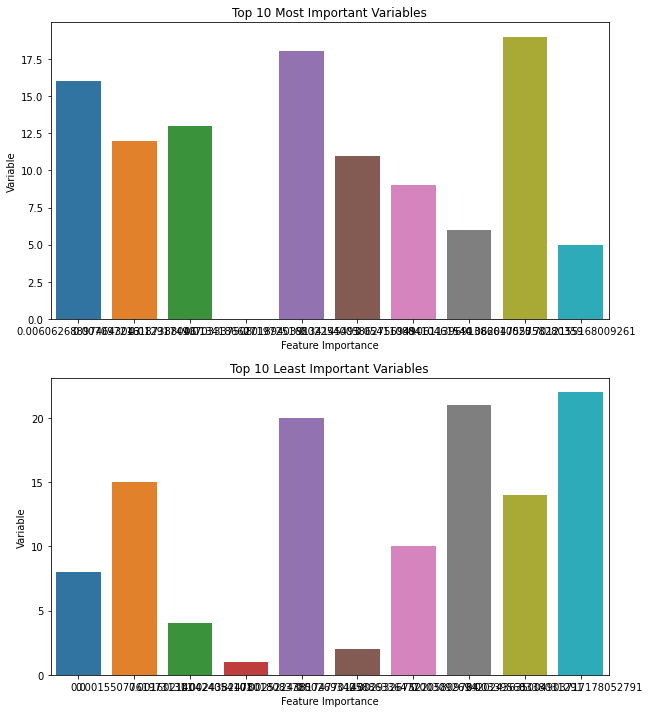

In [35]:
importance_df = pd.Series(XG.feature_importances_).reset_index()
importance_df.columns = ["Variable", "Feature Importance"]
importance_df.sort_values("Feature Importance", ascending = False, ignore_index = True, inplace = True)
plt.figure(figsize = (10, 12))
plt.subplot(2,1,1)
plt.title("Top 10 Most Important Variables")
sns.barplot(y = "Variable", x = "Feature Importance", data = importance_df.iloc[:10, :])
plt.subplot(2,1,2)
plt.title("Top 10 Least Important Variables")
sns.barplot(y = "Variable", x = "Feature Importance", data = importance_df.iloc[-10:, :])
plt.show()